### groupby函数test

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1':list('ababa'),
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})
print(df)

  key1 key2     data1     data2
0    a  one  0.712660 -1.520550
1    b  two  0.458983 -0.028180
2    a  one -0.168139  0.473565
3    b  two  0.473490 -0.882983
4    a  one  0.166564 -2.126323


In [3]:
group_data1 = df.groupby('key1')['data1']

In [4]:
print(group_data1.groups)

{'a': Int64Index([0, 2, 4], dtype='int64'), 'b': Int64Index([1, 3], dtype='int64')}


In [5]:
print(group_data1.size())

key1
a    3
b    2
Name: data1, dtype: int64


### preprocessing practice

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.shape
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [14]:
df['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [16]:
df['SalePrice'].skew()

1.8828757597682129

In [17]:
df['SalePrice'].kurt()

6.536281860064529

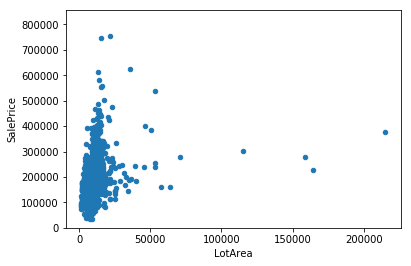

In [22]:
%matplotlib inline
x = 'LotArea'
y = 'SalePrice'
data = pd.concat([df[y], df[x]], axis = 1)
data.plot.scatter(x = x, y = y, ylim = (0, df[y].max()+100000))

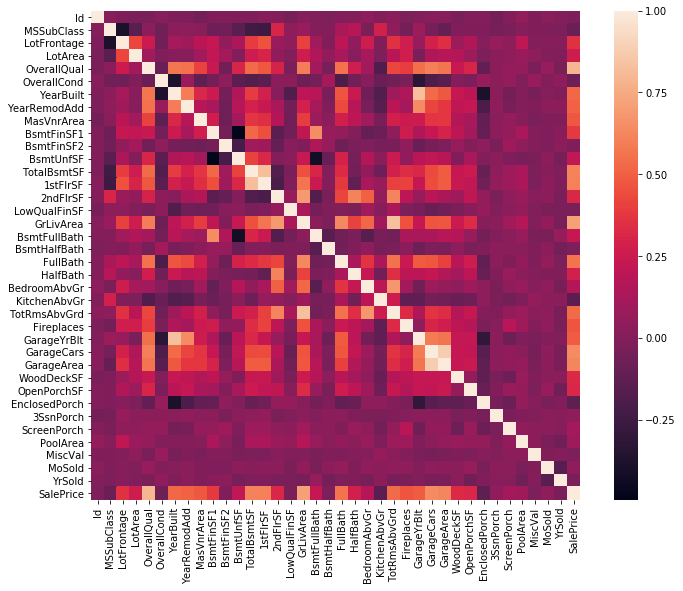

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = df.corr()
fig, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, square = True)

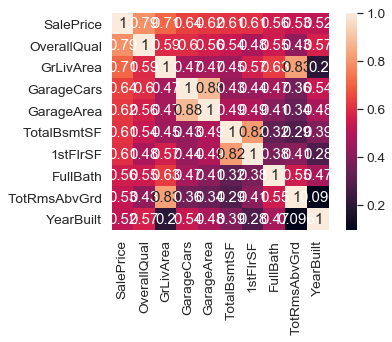

In [27]:
import numpy as np
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [29]:
df_grouped = df.groupby(['Condition1', 'Condition2'], as_index=False)

In [33]:
df_grouped.mean()

,Condition1,Condition2,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Artery,Artery,598.500000,190.000000,78.500000,9017.500000,4.000000,5.500000,1919.500000,1960.000000,...,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,2008.500000,106500.000000
1,Artery,Norm,693.044444,55.444444,71.604651,9967.311111,5.555556,6.022222,1934.577778,1966.044444,...,43.088889,24.266667,65.866667,4.000000,15.133333,11.377778,71.111111,6.088889,2007.888889,132142.222222
2,Artery,PosA,584.000000,75.000000,75.000000,13500.000000,10.000000,9.000000,1893.000000,2000.000000,...,105.000000,502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2008.000000,325000.000000
3,Feedr,Feedr,89.000000,50.000000,105.000000,8470.000000,3.000000,2.000000,1915.000000,1982.000000,...,0.000000,0.000000,156.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2009.000000,85000.000000
4,Feedr,Norm,793.394737,49.868421,76.328125,10732.618421,5.368421,5.776316,1954.552632,1975.447368,...,83.000000,40.144737,30.723684,2.131579,9.907895,6.315789,21.052632,5.973684,2007.881579,143883.013158
5,Feedr,RRAe,1231.000000,90.000000,NaN,18890.000000,5.000000,5.000000,1977.000000,1977.000000,...,155.000000,24.000000,145.000000,0.000000,0.000000,0.000000,8300.000000,8.000000,2007.000000,190000.000000
6,Feedr,RRAn,1004.000000,90.000000,NaN,11500.000000,5.000000,6.000000,1976.000000,1976.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,136905.000000
7,Feedr,RRNn,289.500000,25.000000,54.500000,7279.500000,4.500000,6.500000,1941.000000,1972.500000,...,94.500000,25.000000,43.500000,0.000000,0.000000,0.000000,0.000000,5.500000,2008.000000,96750.000000
8,Norm,Norm,729.751587,57.646825,69.228544,10417.626984,6.153968,5.538095,1973.626190,1985.957937,...,96.258730,46.045238,19.831746,2.937302,15.246825,1.997619,37.653968,6.358730,2007.803968,184495.492063
9,PosA,Norm,673.000000,35.000000,160.500000,16612.375000,6.625000,6.500000,1968.375000,1990.625000,...,84.000000,65.250000,20.250000,0.000000,62.250000,0.000000,0.000000,6.625000,2008.250000,225875.000000
